In [2]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

db = sqlite3.connect('/Users/jluan/code/finance/fmp_data.db')

def query(sql):
  df = pd.read_sql_query(sql, db)
  return df

# BRK's cash % in book value over time

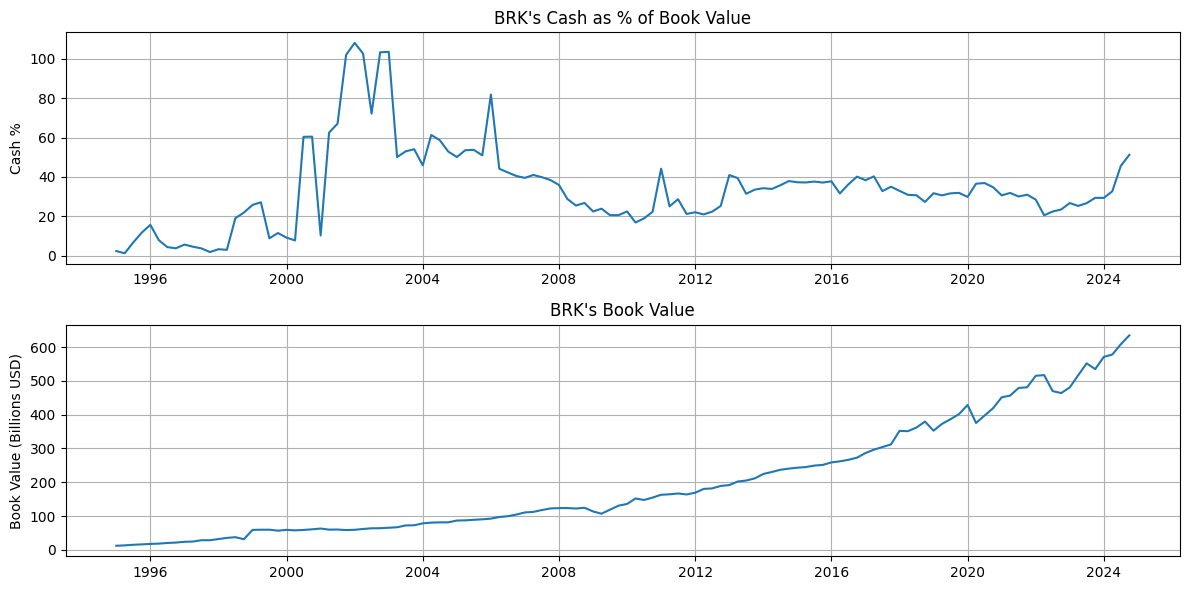

In [4]:
d = query('''
select
    date,
    CAST(cash_and_short_term_investments AS REAL) / total_equity * 100 AS cash_pct, 
    total_equity as bv
from balance_sheet
where symbol = 'BRK-A' 
order by date asc;
''')

# Plot cash percentage over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(pd.to_datetime(d['date']), d['cash_pct'])
plt.title("BRK's Cash as % of Book Value")
plt.ylabel('Cash %')
plt.grid(True)

# Plot book value over time 
plt.subplot(2, 1, 2)
plt.plot(pd.to_datetime(d['date']), d['bv'] / 1e9)  # Convert to billions
plt.title("BRK's Book Value")
plt.ylabel('Book Value (Billions USD)')
plt.grid(True)

plt.tight_layout()
plt.show()
